### Lab 1 - data preprocessing

Data from https://archive.ics.uci.edu/ml/datasets/credit+approval

In [ ]:
import numpy as np
import pandas as pd
import sklearn
sklearn.__version__

'1.2.2'

#### Data reading

In [ ]:
df_raw = pd.read_csv(r'/content/crx.data', header=None)
df_raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
df_raw.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11' , 'A12', 'A13', 'A14', 'A15', 'A16']

In [ ]:
df_raw.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [ ]:
df_raw = df_raw.replace('?', np.nan)

In [ ]:
df_raw['A2'] = df_raw['A2'].astype('float64')
df_raw['A14'] = df_raw['A14'].astype('float64')

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [ ]:
categorical_cols = [column for column in df_raw.columns if df_raw[column].dtype == 'object']
categorical_cols

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16']

In [ ]:
df_raw.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


#### Deleting Nan's

In [ ]:
for column in categorical_cols:
  df_raw[column] = df_raw[column].astype('category')

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   A1      678 non-null    category
 1   A2      678 non-null    float64 
 2   A3      690 non-null    float64 
 3   A4      684 non-null    category
 4   A5      684 non-null    category
 5   A6      681 non-null    category
 6   A7      681 non-null    category
 7   A8      690 non-null    float64 
 8   A9      690 non-null    category
 9   A10     690 non-null    category
 10  A11     690 non-null    int64   
 11  A12     690 non-null    category
 12  A13     690 non-null    category
 13  A14     677 non-null    float64 
 14  A15     690 non-null    int64   
 15  A16     690 non-null    category
dtypes: category(10), float64(4), int64(2)
memory usage: 41.2 KB


In [ ]:
df_raw.describe(include=['category'])

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [ ]:
df_raw.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [ ]:
df_raw.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [ ]:
df = df_raw.copy()
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [ ]:
df_raw.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [ ]:
df.shape

(690, 16)

In [ ]:
numerical_cols = [column for column in df_raw.columns if df_raw[column].dtype in ['int64', 'float64']]
numerical_cols

['A2', 'A3', 'A8', 'A11', 'A14', 'A15']

Missing values in columns with numerical data will be filled by mean of values in column

In [ ]:
for column in numerical_cols:
  df[column].fillna(df[column].mean(), inplace=True)

In [ ]:
df.isnull().sum()

A1     12
A2      0
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14     0
A15     0
A16     0
dtype: int64

<Axes: >

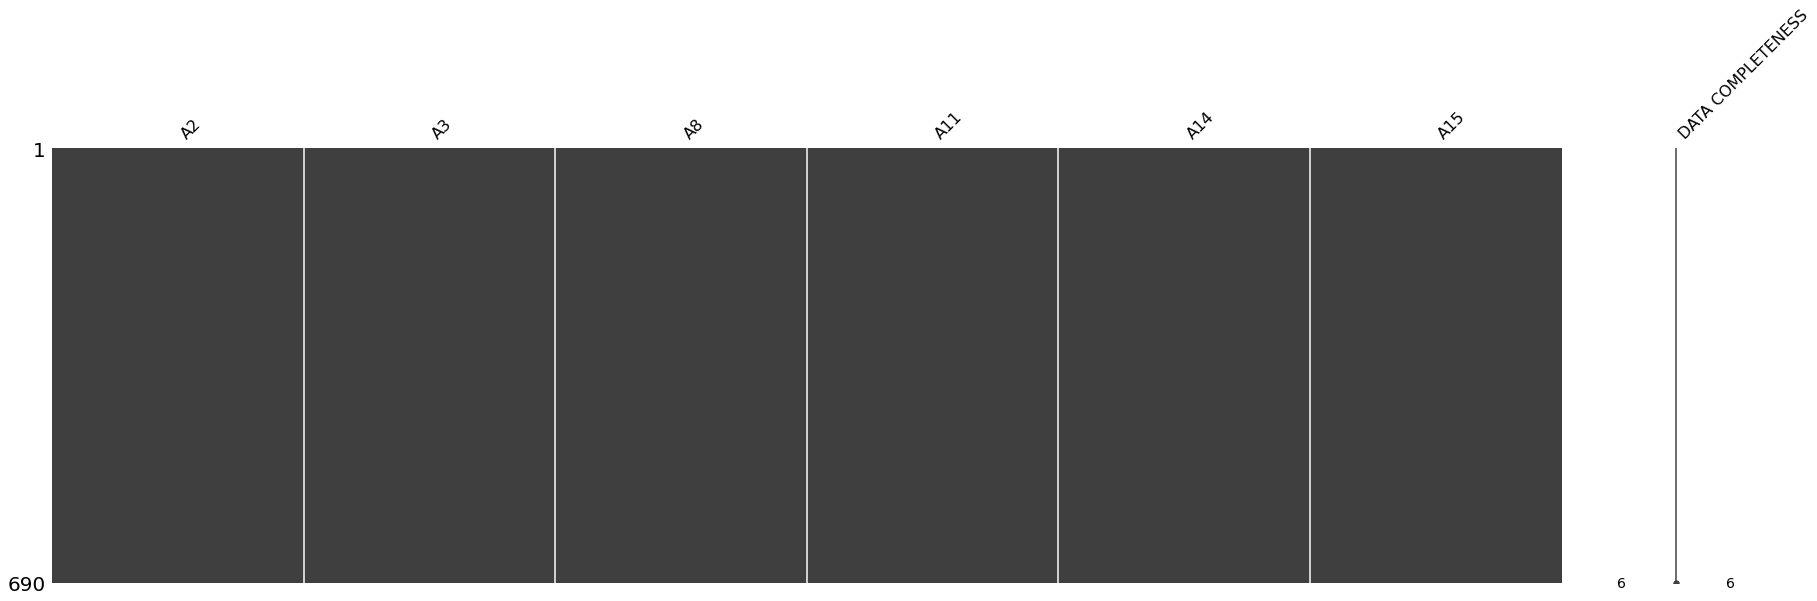

In [ ]:
import missingno as msno
msno.matrix(df[numerical_cols], labels=True, figsize=(30, 8))

In [ ]:
df.shape

(690, 16)

<Axes: >

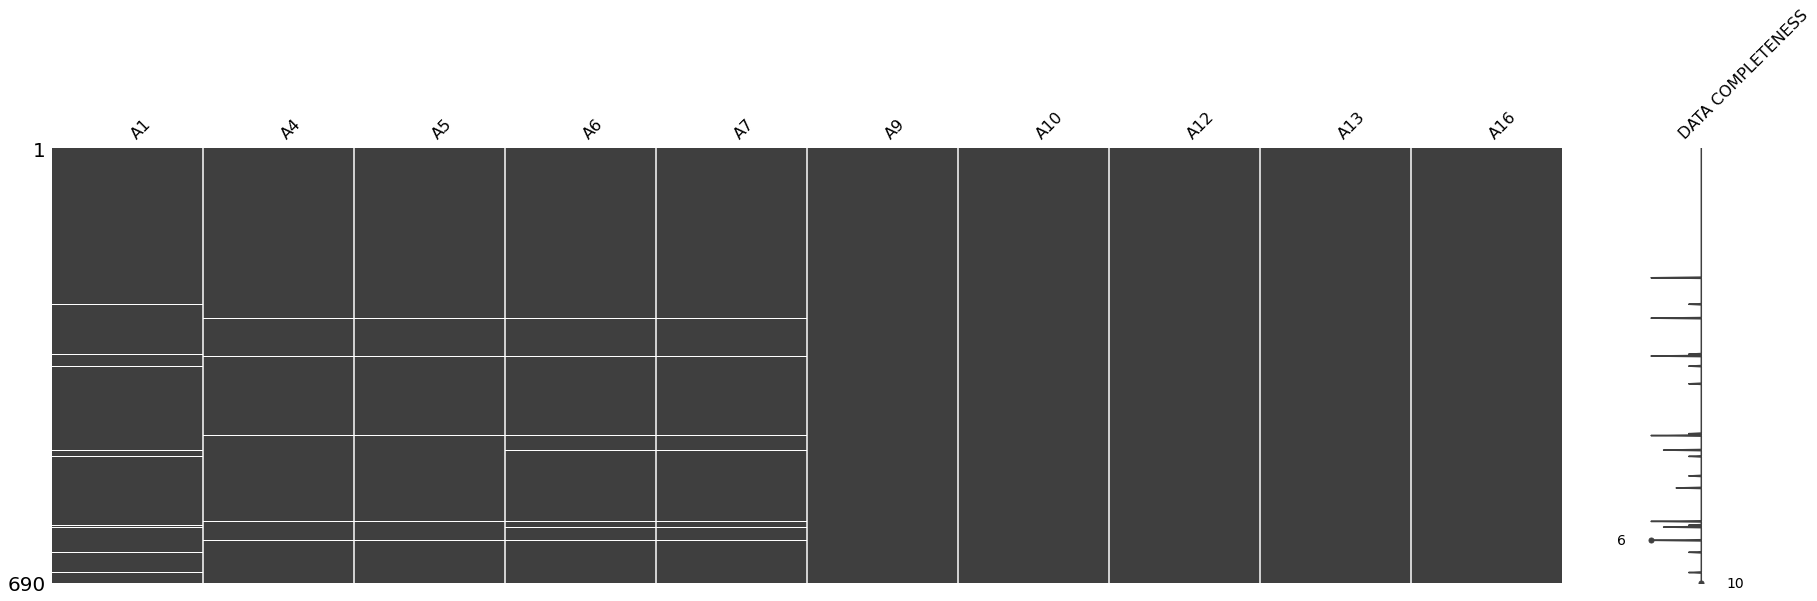

In [ ]:
import missingno as msno
msno.matrix(df[categorical_cols], labels=True, figsize=(30, 8))

Rows with missing categorical data will be deleted. 
Missing values can be also replaced by most common value in column but it can be problematic in such small data set.

In [ ]:
df = df.dropna(axis=0)
df.shape

(671, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   A1      671 non-null    category
 1   A2      671 non-null    float64 
 2   A3      671 non-null    float64 
 3   A4      671 non-null    category
 4   A5      671 non-null    category
 5   A6      671 non-null    category
 6   A7      671 non-null    category
 7   A8      671 non-null    float64 
 8   A9      671 non-null    category
 9   A10     671 non-null    category
 10  A11     671 non-null    int64   
 11  A12     671 non-null    category
 12  A13     671 non-null    category
 13  A14     671 non-null    float64 
 14  A15     671 non-null    int64   
 15  A16     671 non-null    category
dtypes: category(10), float64(4), int64(2)
memory usage: 45.3 KB


In [ ]:
df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

#### Scatter matrix

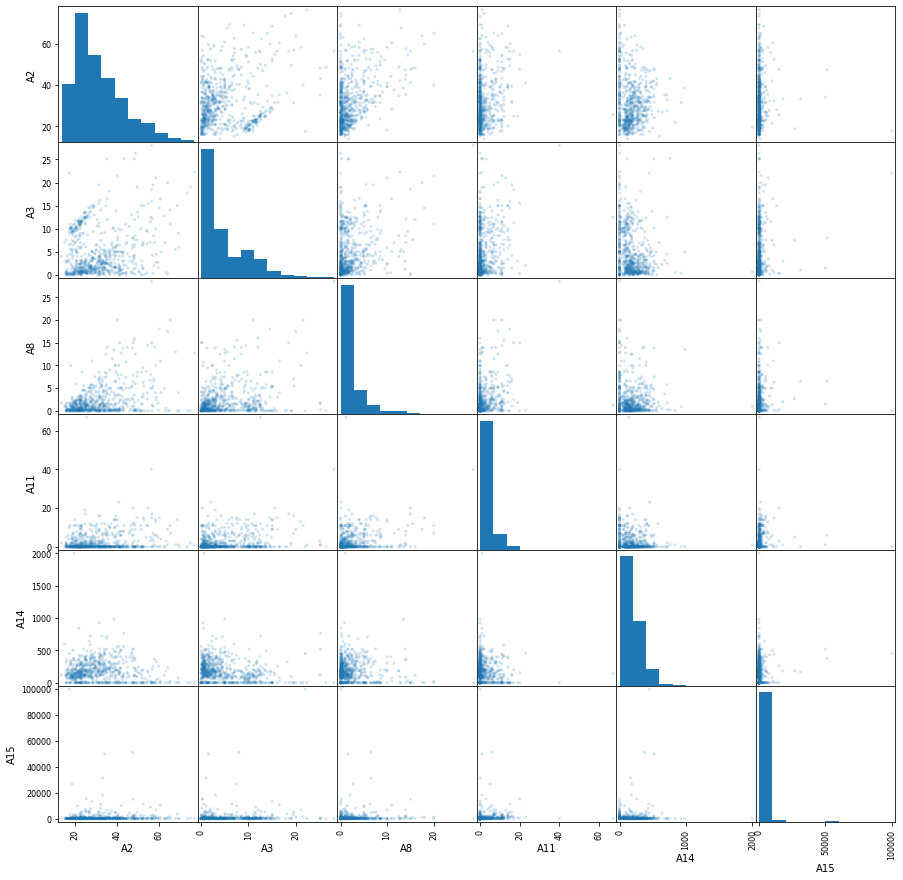

In [ ]:
_ = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(15, 15))

#### One hot encoding

In [ ]:
df_categorical = pd.get_dummies(df[categorical_cols], drop_first=True)
df_categorical.columns

Index(['A1_b', 'A4_u', 'A4_y', 'A5_gg', 'A5_p', 'A6_c', 'A6_cc', 'A6_d',
       'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w',
       'A6_x', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o', 'A7_v',
       'A7_z', 'A9_t', 'A10_t', 'A12_t', 'A13_p', 'A13_s', 'A16_-'],
      dtype='object')

In [ ]:
df_numerical = df[numerical_cols]
df_numerical.columns

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15'], dtype='object')

In [ ]:
df = pd.concat(objs=[df_numerical, df_categorical], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671 entries, 0 to 689
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A2      671 non-null    float64
 1   A3      671 non-null    float64
 2   A8      671 non-null    float64
 3   A11     671 non-null    int64  
 4   A14     671 non-null    float64
 5   A15     671 non-null    int64  
 6   A1_b    671 non-null    uint8  
 7   A4_u    671 non-null    uint8  
 8   A4_y    671 non-null    uint8  
 9   A5_gg   671 non-null    uint8  
 10  A5_p    671 non-null    uint8  
 11  A6_c    671 non-null    uint8  
 12  A6_cc   671 non-null    uint8  
 13  A6_d    671 non-null    uint8  
 14  A6_e    671 non-null    uint8  
 15  A6_ff   671 non-null    uint8  
 16  A6_i    671 non-null    uint8  
 17  A6_j    671 non-null    uint8  
 18  A6_k    671 non-null    uint8  
 19  A6_m    671 non-null    uint8  
 20  A6_q    671 non-null    uint8  
 21  A6_r    671 non-null    uint8  
 22  A6

In [ ]:
X = df.copy()
X

,A2,A3,A8,A11,A14,A15,A1_b,A4_u,A4_y,A5_gg,...,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s,A16_-
0,30.83,0.000,1.25,1,202.0,0,1,1,0,0,...,0,0,1,0,1,1,0,0,0,0
1,58.67,4.460,3.04,6,43.0,560,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2,24.50,0.500,1.50,0,280.0,824,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,27.83,1.540,3.75,5,100.0,3,1,1,0,0,...,0,0,1,0,1,1,1,0,0,0
4,20.17,5.625,1.71,0,120.0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,260.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
686,22.67,0.750,2.00,2,200.0,394,0,1,0,0,...,0,0,1,0,0,1,1,0,0,1
687,25.25,13.500,2.00,1,200.0,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
688,17.92,0.205,0.04,0,280.0,750,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
y = X.pop('A16_-')

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
685    1
686    1
687    1
688    1
689    1
Name: A16_-, Length: 671, dtype: uint8

In [ ]:
X.shape

(671, 37)

In [ ]:
df.shape

(671, 38)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (503, 37)
y_train shape:  (503,)
X_test shape:  (168, 37)
y_test shape:  (168,)


#### Normalization (min-max scaling)

In [ ]:
columns = X.columns
columns

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1_b', 'A4_u', 'A4_y', 'A5_gg',
       'A5_p', 'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j',
       'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_dd', 'A7_ff',
       'A7_h', 'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A9_t', 'A10_t',
       'A12_t', 'A13_p', 'A13_s'],
      dtype='object')

In [ ]:
len(columns)

37

In [ ]:
X_train.head()

,A2,A3,A8,A11,A14,A15,A1_b,A4_u,A4_y,A5_gg,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
452,36.50,4.250,3.500,0,454.0,50,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
365,42.83,1.250,13.875,1,352.0,112,1,1,0,0,...,0,0,0,1,0,0,1,1,0,0
495,19.17,9.500,1.500,0,120.0,2206,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
378,34.42,1.335,0.125,0,440.0,4500,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,32.08,4.000,2.500,0,360.0,0,1,1,0,0,...,0,0,0,1,0,1,0,1,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_normalized = pd.DataFrame(scaler.transform(X_train), columns=columns)
X_train_normalized.head()


,A2,A3,A8,A11,A14,A15,A1_b,A4_u,A4_y,A5_gg,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
0,0.339297,0.151786,0.122807,0.000000,0.227,0.000978,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.443204,0.044643,0.486842,0.014925,0.176,0.002192,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.054826,0.339286,0.052632,0.000000,0.060,0.043170,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.305154,0.047679,0.004386,0.000000,0.220,0.088063,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.266743,0.142857,0.087719,0.000000,0.180,0.000000,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
X_test_normalized = pd.DataFrame(scaler.transform(X_test), columns=columns)
X_test_normalized.head()

,A2,A3,A8,A11,A14,A15,A1_b,A4_u,A4_y,A5_gg,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
0,0.109488,0.014821,0.011754,0.000000,0.072,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.008207,0.098214,0.023333,0.014925,0.040,0.000411,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.314675,0.120536,0.290877,0.000000,0.000,0.000000,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.265430,0.214286,0.043860,0.000000,0.136,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.445995,0.010357,0.061404,0.119403,0.050,0.007339,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


#### Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_standarized = pd.DataFrame(scaler.transform(X_train), columns=columns)
X_train_standarized.head()

,A2,A3,A8,A11,A14,A15,A1_b,A4_u,A4_y,A5_gg,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
0,0.405575,-0.135890,0.366599,-0.466847,1.525540,-0.216950,0.673615,0.559746,-0.559746,0.0,...,-0.118798,-0.07746,-0.044632,0.839693,-0.089532,-1.063652,-0.853535,-0.885262,-0.044632,-0.281779
1,0.946318,-0.739792,3.402494,-0.274368,0.953006,-0.200594,0.673615,0.559746,-0.559746,0.0,...,-0.118798,-0.07746,-0.044632,0.839693,-0.089532,-1.063652,1.171598,1.129610,-0.044632,-0.281779
2,-1.074848,0.920939,-0.218633,-0.466847,-0.349228,0.351812,0.673615,0.559746,-0.559746,0.0,...,-0.118798,-0.07746,-0.044632,0.839693,-0.089532,0.940157,-0.853535,-0.885262,-0.044632,-0.281779
3,0.227890,-0.722682,-0.620981,-0.466847,1.446957,0.956979,0.673615,0.559746,-0.559746,0.0,...,-0.118798,-0.07746,-0.044632,-1.190911,-0.089532,-1.063652,-0.853535,1.129610,-0.044632,-0.281779
4,0.027995,-0.186215,0.073983,-0.466847,0.997911,-0.230140,0.673615,0.559746,-0.559746,0.0,...,-0.118798,-0.07746,-0.044632,0.839693,-0.089532,0.940157,-0.853535,1.129610,-0.044632,-0.281779


In [ ]:
X_test_standarized = pd.DataFrame(scaler.transform(X_test), columns=columns)
X_test_standarized.head()

,A2,A3,A8,A11,A14,A15,A1_b,A4_u,A4_y,A5_gg,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
0,-0.790381,-0.907878,-0.559531,-0.466847,-0.214514,-0.230140,-1.484527,0.559746,-0.559746,0.0,...,-0.118798,-0.07746,-0.044632,0.839693,-0.089532,-1.063652,-0.853535,1.129610,-0.044632,3.548886
1,-1.317456,-0.437841,-0.462968,-0.274368,-0.573751,-0.224600,0.673615,0.559746,-0.559746,0.0,...,-0.118798,-0.07746,-0.044632,0.839693,-0.089532,-1.063652,1.171598,-0.885262,-0.044632,-0.281779
2,0.277437,-0.312028,1.768232,-0.466847,-1.022797,-0.230140,0.673615,0.559746,-0.559746,0.0,...,-0.118798,-0.07746,-0.044632,-1.190911,-0.089532,-1.063652,-0.853535,1.129610,-0.044632,-0.281779
3,0.021161,0.216386,-0.291787,-0.466847,0.503960,-0.230140,-1.484527,0.559746,-0.559746,0.0,...,-0.118798,-0.07746,-0.044632,0.839693,-0.089532,-1.063652,-0.853535,-0.885262,-0.044632,-0.281779
4,0.960841,-0.933041,-0.145479,1.072983,-0.461489,-0.131214,0.673615,-1.786524,1.786524,0.0,...,-0.118798,-0.07746,-0.044632,-1.190911,-0.089532,0.940157,1.171598,-0.885262,-0.044632,-0.281779


#### k-NN (k Nearest Neighbours)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)

y_predict[:10]

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1], dtype=uint8)

In [ ]:
knn_results = pd.DataFrame(
    {'y_true' : y_test,
     'y_predict_original' : y_predict})

knn_results.head()

,y_true,y_predict_original
652,1,1
298,1,1
689,1,1
267,1,1
142,0,1


In [ ]:
neigh = KNeighborsClassifier()
neigh.fit(X_train_normalized, y_train)
y_predict_norm = neigh.predict(X_test_normalized)
knn_results['y_predict_normalized'] = y_predict_norm
knn_results.head()

,y_true,y_predict_original,y_predict_normalized
652,1,1,1
298,1,1,1
689,1,1,1
267,1,1,1
142,0,1,0


In [ ]:
neigh = KNeighborsClassifier()
neigh.fit(X_train_standarized, y_train)
y_predict_std = neigh.predict(X_test_standarized)
knn_results['y_predict_standarized'] = y_predict_std
knn_results.head()

,y_true,y_predict_original,y_predict_normalized,y_predict_standarized
652,1,1,1,1
298,1,1,1,1
689,1,1,1,0
267,1,1,1,1
142,0,1,0,0


In [ ]:
from sklearn.metrics import accuracy_score

acc_original = accuracy_score(knn_results['y_true'], knn_results['y_predict_original'])
acc_normalized = accuracy_score(knn_results['y_true'], knn_results['y_predict_normalized'])
acc_standarized = accuracy_score(knn_results['y_true'], knn_results['y_predict_standarized'])

print("Accuracy - original data: ", acc_original)
print("Accuracy - normalized data: ", acc_normalized)
print("Accuracy - standarized data: ", acc_standarized)

Accuracy - original data:  0.7083333333333334
Accuracy - normalized data:  0.8630952380952381
Accuracy - standarized data:  0.7797619047619048


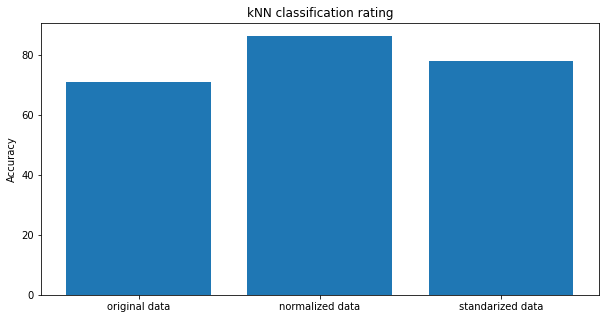

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
plt.bar(["original data", "normalized data", "standarized data"], [acc_original*100, acc_normalized*100, acc_standarized*100])
plt.title("kNN classification rating")
plt.ylabel("Accuracy")
fig.show()

In [ ]:
from sklearn.model_selection import cross_val_score

neigh = KNeighborsClassifier()
acc_cv_original = cross_val_score(neigh, X_train, y_train, cv=5).mean()
acc_cv_normalized = cross_val_score(neigh, X_train_normalized, y_train, cv=5).mean()
acc_cv_standarized = cross_val_score(neigh, X_train_standarized, y_train, cv=5).mean()

print("Accuracy withc CV - original data: ", acc_cv_original)
print("Accuracy withc CV - normalized data: ", acc_cv_normalized)
print("Accuracy withc CV - standarized data: ", acc_cv_standarized)


Accuracy withc CV - original data:  0.6481782178217822
Accuracy withc CV - normalized data:  0.820990099009901
Accuracy withc CV - standarized data:  0.7992079207920793


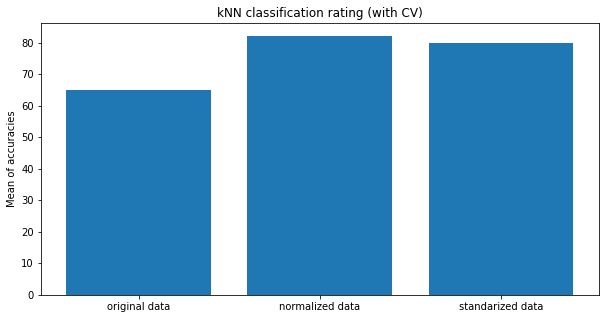

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
plt.bar(["original data", "normalized data", "standarized data"], [acc_cv_original*100, acc_cv_normalized*100, acc_cv_standarized*100])
plt.title("kNN classification rating (with CV)")
plt.ylabel("Mean of accuracies")
fig.show()

#### Random forest classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)

y_predict[:10]

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=uint8)

In [ ]:
rfc_results = pd.DataFrame(
    {'y_true' : y_test,
     'y_predict_original' : y_predict})

rfc_results.head()

,y_true,y_predict_original
652,1,1
298,1,1
689,1,1
267,1,1
142,0,0


In [ ]:
rfc = RandomForestClassifier() 
rfc.fit(X_train_normalized, y_train)
y_predict_norm = rfc.predict(X_test_normalized)
rfc_results['y_predict_normalized'] = y_predict_norm
rfc_results.head()

,y_true,y_predict_original,y_predict_normalized
652,1,1,1
298,1,1,1
689,1,1,1
267,1,1,1
142,0,0,0


In [ ]:
rfc = RandomForestClassifier() 
rfc.fit(X_train_standarized, y_train)
y_predict_std = rfc.predict(X_test_standarized)
rfc_results['y_predict_standarized'] = y_predict_std
rfc_results.head()

,y_true,y_predict_original,y_predict_normalized,y_predict_standarized
652,1,1,1,1
298,1,1,1,1
689,1,1,1,1
267,1,1,1,1
142,0,0,0,0


In [ ]:
acc_original = accuracy_score(rfc_results['y_true'], rfc_results['y_predict_original'])
acc_normalized = accuracy_score(rfc_results['y_true'], rfc_results['y_predict_normalized'])
acc_standarized = accuracy_score(rfc_results['y_true'], rfc_results['y_predict_standarized'])

print("Accuracy - original data: ", acc_original)
print("Accuracy - normalized data: ", acc_normalized)
print("Accuracy - standarized data: ", acc_standarized)

Accuracy - original data:  0.9107142857142857
Accuracy - normalized data:  0.9166666666666666
Accuracy - standarized data:  0.9047619047619048


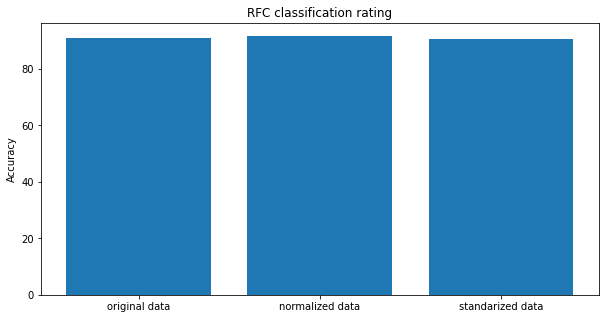

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.bar(["original data", "normalized data", "standarized data"], [acc_original*100, acc_normalized*100, acc_standarized*100])
plt.title("RFC classification rating")
plt.ylabel("Accuracy")
fig.show()

In [ ]:
rfc = RandomForestClassifier()
acc_cv_original = cross_val_score(rfc, X_train, y_train, cv=5).mean()
acc_cv_normalized = cross_val_score(rfc, X_train_normalized, y_train, cv=5).mean()
acc_cv_standarized = cross_val_score(rfc, X_train_standarized, y_train, cv=5).mean()

print("Accuracy withc CV - original data: ", acc_cv_original)
print("Accuracy withc CV - normalized data: ", acc_cv_normalized)
print("Accuracy withc CV - standarized data: ", acc_cv_standarized)

Accuracy withc CV - original data:  0.8607920792079208
Accuracy withc CV - normalized data:  0.8608316831683169
Accuracy withc CV - standarized data:  0.8608316831683169


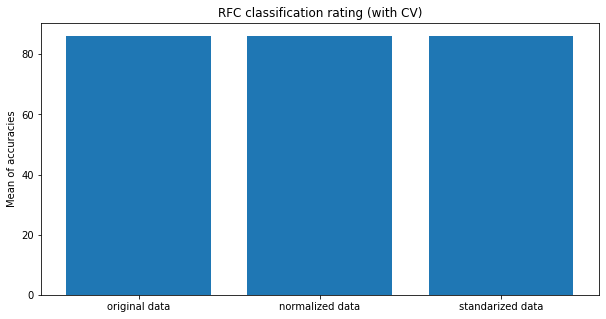

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.bar(["original data", "normalized data", "standarized data"], [acc_cv_original*100, acc_cv_normalized*100, acc_cv_standarized*100])
plt.title("RFC classification rating (with CV)")
plt.ylabel("Mean of accuracies")
fig.show()

#### Precision-recall and ROC curve

##### SVM

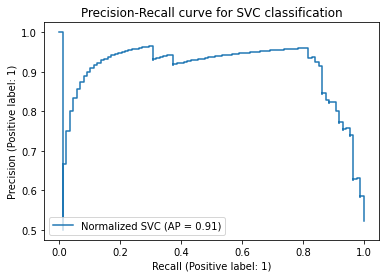

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

classifier = make_pipeline(MinMaxScaler(), SVC())
classifier.fit(X_train, y_train)
display = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test, name="Normalized SVC")
_ = display.ax_.set_title("Precision-Recall curve for SVC classification")

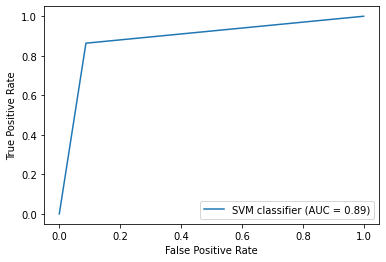

In [ ]:
from sklearn.metrics import RocCurveDisplay, auc, roc_curve

y_pred_svm = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVM classifier')
display.plot()

##### Naive Bayes

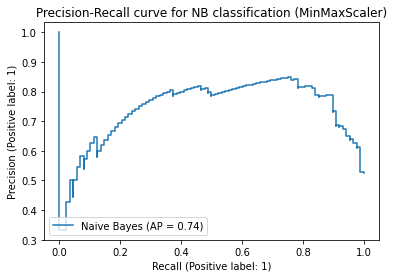

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier_nb = make_pipeline(MinMaxScaler(), GaussianNB())
classifier_nb.fit(X_train, y_train)
display = PrecisionRecallDisplay.from_estimator(classifier_nb, X_test, y_test, name="Naive Bayes")
_ = display.ax_.set_title("Precision-Recall curve for NB classification (MinMaxScaler)")

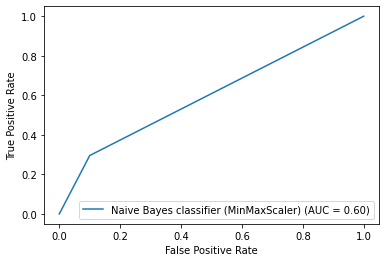

In [ ]:
y_pred_svm = classifier_nb.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Naive Bayes classifier (MinMaxScaler)')
display.plot()

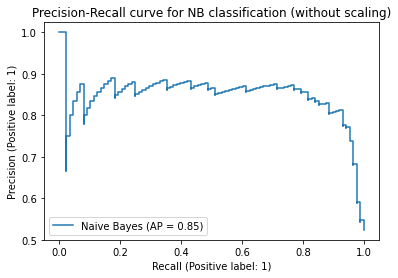

In [ ]:
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)
display = PrecisionRecallDisplay.from_estimator(classifier_nb, X_test, y_test, name="Naive Bayes")
_ = display.ax_.set_title("Precision-Recall curve for NB classification (without scaling)")

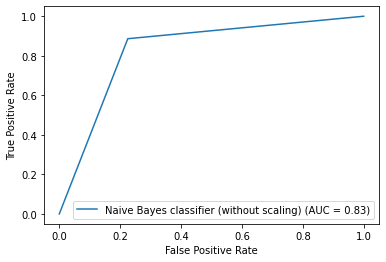

In [ ]:
y_pred_svm = classifier_nb.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Naive Bayes classifier (without scaling)')
display.plot()

Surprisingly, without scaling we have better results.